[google drive link](https://drive.google.com/drive/folders/1fg2YvvirqshoUfIO8CL_yaoWFtnPvGGy)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Visualization function for better representation of matrix values
def plot_matrix_with_values(matrix, title='Matrix'):
    plt.figure(figsize=(6, 6))
    plt.imshow(matrix, cmap='Blues', interpolation='nearest')
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            plt.text(j, i, f'{matrix[i, j]:.1f}', ha='center', va='center', color='red', fontsize=8)
    plt.title(title)
    plt.colorbar()
    plt.show()

In [18]:
# ReLU Activation
def relu(x: np.ndarray):
    """
    Applies the ReLU activation function to a given input matrix.
    Task:
    - Replace all negative values in the input matrix with 0.
    """
    return np.maximum(0,x)

# Convolutional Layer
class Convolutional:
    """
    Represents a convolutional layer with optional padding and stride.

    Attributes:
    - name (str): The name of the layer (e.g., 'conv1').
    - kernel (np.ndarray): The filter to convolve with.
    - stride (int): Step size for sliding the kernel.
    - padding (int): Padding to apply around the input.

    Methods:
    - forward(input): Computes the convolution operation on the input matrix.
    """
    def __init__(self, name:str, kernel:np.ndarray, stride:int=1, padding:int=0):
        """
        Initializes the convolutional layer.
        Task:
        - Store the parameters (name, kernel, stride, padding). 
        """
        self.name = name
        self.kernel = kernel
        self.stride = stride
        self.padding = padding

    def forward(self, input_mat:np.ndarray):
        """
        Computes the forward pass of the convolution operation.
        Task:
        - Add padding to the input (if required).
        - Slide the kernel across the input matrix with the given stride.
        - Compute the sum of element-wise products at each step.
        - Return the resulting feature map.
        """
        if self.padding > 0:
                    input_mat = np.pad(input_mat, 
                                pad_width=((self.padding, self.padding), 
                                            (self.padding, self.padding)), 
                                mode='constant', 
                                constant_values=0)

        input_height, input_width = input_mat.shape
        kernel_height, kernel_width = self.kernel.shape
        # floor((W - K +2P)/S) + 1
        output_height = (input_height - kernel_height) // self.stride + 1
        output_width = (input_width - kernel_width) // self.stride + 1
        
        feature_map = np.zeros((output_height, output_width))
        
        # convolution
        for i in range(0, output_height):
            for j in range(0, output_width):
                region = input_mat[i * self.stride:i * self.stride + kernel_height,
                            j * self.stride:j * self.stride + kernel_width]
                feature_map[i, j] = np.sum(region * self.kernel)
        return feature_map
                

# Max Pooling Layer
class MaxPoolingLayer:
    """
    Represents a max pooling layer.

    Attributes:
    - name (str): The name of the layer (e.g., 'pool1').
    - pool_size (int): The size of the pooling window.
    - stride (int): Step size for sliding the pooling window.

    Methods:
    - forward(input): Applies max pooling to the input matrix.
    """
    def __init__(self, name:str, pool_size:int, stride:int):
        """
        Initializes the max pooling layer.
        Task:
        - Store the parameters (name, pool_size, stride).
        """
        self.name = name
        self.pool_size = pool_size
        self.stride = stride

    def forward(self, input_mat:np.ndarray):
        """
        Computes the forward pass of the max pooling operation.
        Task:
        - Slide the pooling window across the input matrix with the given stride.
        - Select the maximum value within each window.
        - Return the resulting downsampled feature map.
        """
        input_height, input_width = input_mat.shape

        output_height = (input_height - self.pool_size) // self.stride + 1
        output_width = (input_width - self.pool_size) // self.stride + 1

        subsampled_output = np.zeros((output_height, output_width))

        # Perform max pooling
        for i in range(0, output_height):
            for j in range(0, output_width):
                start_i = i * self.stride
                start_j = j * self.stride
                window = input_mat[start_i:start_i + self.pool_size, start_j:start_j + self.pool_size]                
                subsampled_output[i, j] = np.max(window)
        return subsampled_output

# Average Pooling Layer
class AveragePoolingLayer:
    """
    Represents an average pooling layer.

    Attributes:
        name (str): The name of the layer (e.g., 'pool1_avg').
        pool_size (int): The size of the pooling window.
        stride (int): Step size for sliding the pooling window.

    Methods:
        forward(input): Applies average pooling to the input matrix.
    """
    def __init__(self, name: str, pool_size: int = 2, stride: int = 2):
        """
        Initializes the average pooling layer.
        Args:
            name (str): Name of the pooling layer.
            pool_size (int): Size of the pooling window (default: 2).
            stride (int): Step size for sliding the pooling window (default: 2).
        """
        self.name = name
        self.pool_size = pool_size
        self.stride = stride
    def forward(self, input_mat):
        """
        Computes the forward pass of the average pooling operation.
        Task:
        - Slide the pooling window across the input matrix with the given stride.
        - Compute the average value within each window.
        - Return the resulting downsampled feature map.
        """
        input_height, input_width = input_mat.shape

        output_height = (input_height - self.pool_size) // self.stride + 1
        output_width = (input_width - self.pool_size) // self.stride + 1

        subsampled_output = np.zeros((output_height, output_width))

        # Perform average pooling
        for i in range(0, output_height):
            for j in range(0, output_width):
                # Extract the current window
                start_i = i * self.stride
                start_j = j * self.stride
                window = input_mat[start_i:start_i + self.pool_size, start_j:start_j + self.pool_size]
                subsampled_output[i, j] = np.mean(window)
        
        return subsampled_output

# Residual Block
class ResidualBlock:
    """
    Represents a residual block that implements skip connections.

    Attributes:
    - name (str): The name of the block (e.g., 'residual1').

    Methods:
    - forward(input_mat, residual): Adds the input and residual matrices element-wise and applies ReLU activation.
    """
    def __init__(self, name:str):
        """
        Initializes the residual block.
        Task:
        - Store the name of the block.
        """
        self.name = name

    def forward(self, input_mat:np.ndarray, residual:np.ndarray):
        """
        Computes the forward pass of the residual block.
        Task:
        - Add the input matrix and the residual matrix element-wise.
        - Apply the ReLU activation function to the result.
        - Return the resulting matrix.
        """
        if input_mat.shape != residual.shape:
             raise ValueError(f"input_mat and residucal matrices should have identical shapes. {input_mat.shape} - {residual.shape}")
        
        output = input_mat + residual
        return output

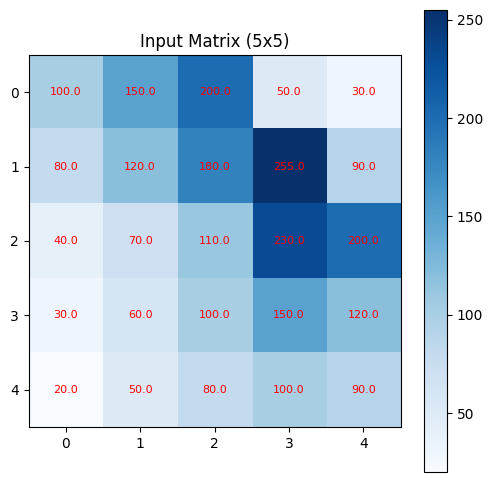

In [2]:
# Step 0: Define the Input Matrix
# Use this fixed 5x5 input matrix for all your calculations to ensure consistent results.
test_input = np.array([[100, 150, 200, 50, 30],
                       [80, 120, 180, 255, 90],
                       [40, 70, 110, 230, 200],
                       [30, 60, 100, 150, 120],
                       [20, 50, 80, 100, 90]])
plot_matrix_with_values(test_input, "Input Matrix (5x5)")

# Step 1: Convolution
# Fixed 3x3 Convolutional Filter (Kernel) to be used
conv_filter = np.array([[0.1, -0.2, 0.1],
                        [-0.3, 0.4, 0.1],
                        [0.2, -0.5, 0.1]])


You are tasked with implementing a simplified forward pass of a convolutional neural network (CNN) that includes a residual block. The steps include performing a convolution operation with the given filter, applying the ReLU function to the convolution output, adding a skip connection (residual addition) with the original input, performing 2×2 max pooling, and finally applying global average pooling to obtain a single scalar value. The resulting images at each step are provided to allow you to compare your outputs with the expected results.

### Perform forward pass on test_input and apply ReLU

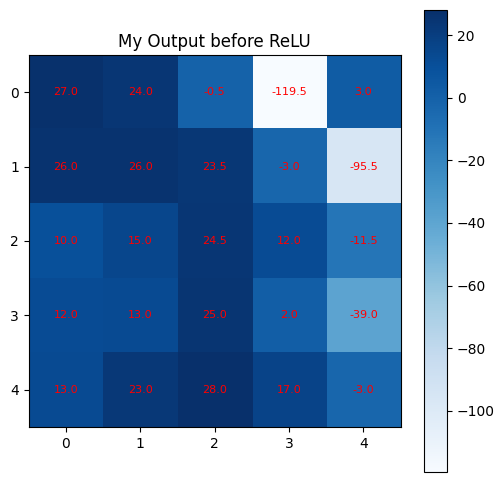

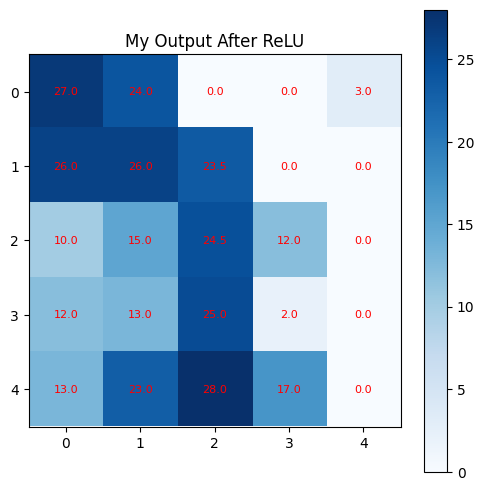

In [6]:
conv_layer = Convolutional(name='conv', kernel=conv_filter, stride=1, padding=1)
conv_output = conv_layer.forward(test_input)
relu_output = relu(conv_output)
plot_matrix_with_values(conv_output, "My Output before ReLU")
plot_matrix_with_values(relu_output, "My Output After ReLU")

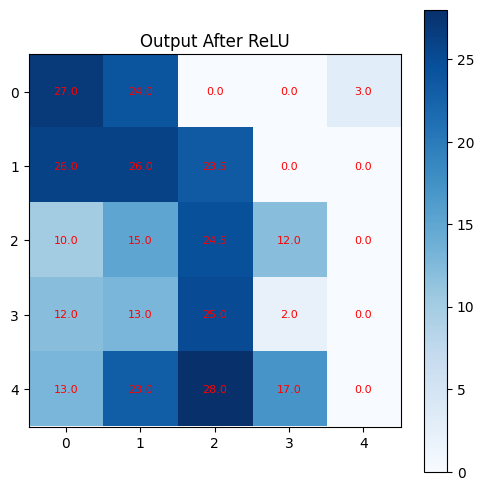

### Feed through Residual Block

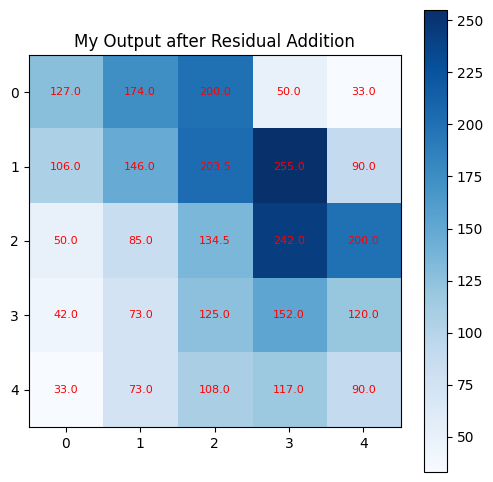

In [13]:
res_block = ResidualBlock(name='res')
res_matrix = test_input
res_output = res_block.forward(relu_output, res_matrix)
res_output = relu(res_output)
plot_matrix_with_values(res_output, "My Output after Residual Addition")

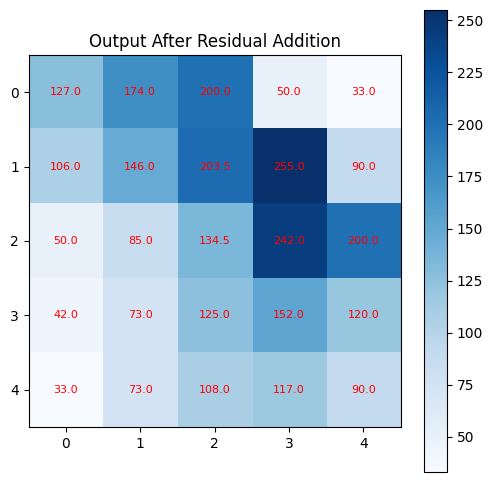

### Perform Max Pooling with 2x2 filters and stride 2

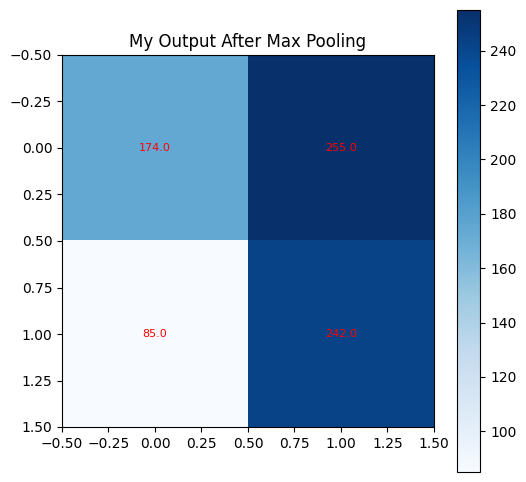

In [17]:
max_pool_layer = MaxPoolingLayer(name='max_pool', pool_size=2, stride=2)
max_pooled_output = max_pool_layer.forward(res_output)
plot_matrix_with_values(max_pooled_output, "My Output After Max Pooling")

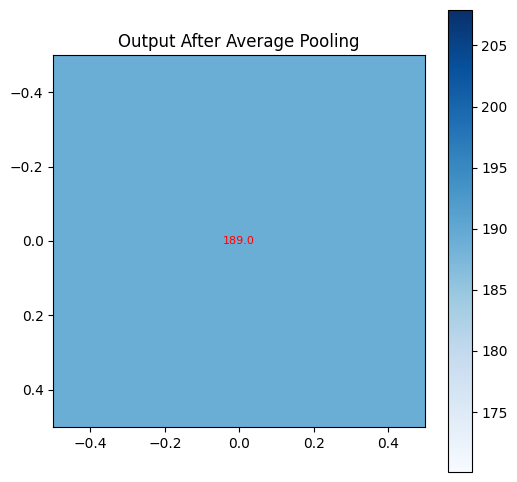

### Perform Global Average Pooling to extract a single scaler

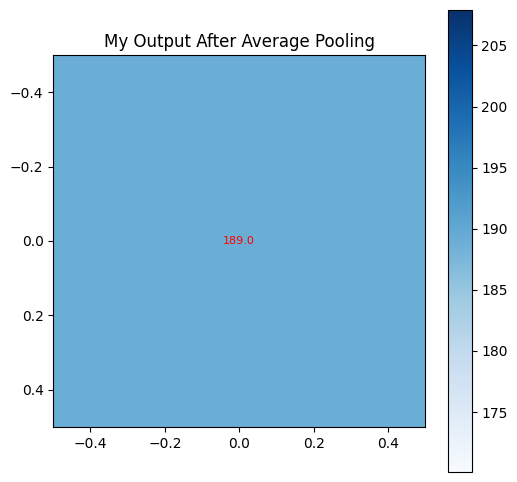

In [21]:
global_avg_layer = AveragePoolingLayer(name='global_avg_pool', pool_size=2, stride=1)
avg_pooled_scaler = global_avg_layer.forward(max_pooled_output)
plot_matrix_with_values(avg_pooled_scaler, "My Output After Average Pooling")

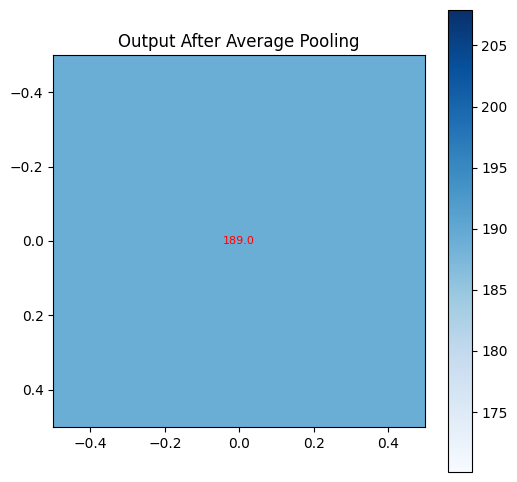